# Understanding Descriptive Statistics

Import the necessary libraries here:

In [337]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [364]:
# your code here

def roll10():
    result = [random.choice(range(1,7)) for roll in range(10)]
    return result

In [365]:
result10 = pd.DataFrame(roll10())
result10.rename(columns = {0:'value'}, inplace = True)
result10

,value
0,3
1,6
2,3
3,4
4,6
5,1
6,2
7,5
8,5
9,6


#### 2.- Plot the results sorted by value.

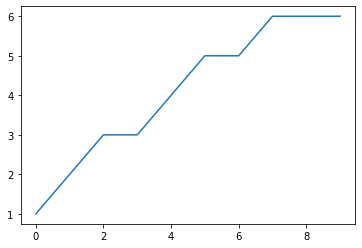

In [366]:
# your code here

sort10 = list(result10['value'])
sort10.sort()
plt.plot(sort10)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

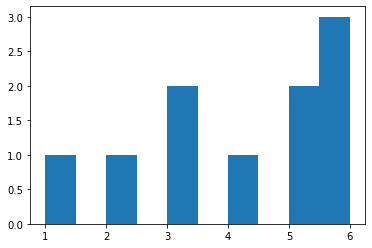

In [367]:
# your code here
plt.hist(result10['value'].sort_values())
plt.show()

In [269]:
"""
Both represent the frequency of each number. In the first plot, the numbers are in the Y-axis and the X-axis represents the index, while in the second plot, the numbers are in the X-axis and its frequency is in the Y-axis.
"""

'\nBoth represent the frequency of each number. In the first plot, the numbers are in the Y-axis and the X-axis represents the index, while in the second plot, the numbers are in the X-axis and its frequency is in the Y-axis.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [368]:
# your code here
def dicemean(df):
    return df['value'].sum()/len(df)

dicemean(result10)

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [370]:
# your code here
freqvals = result10.groupby(['value']).agg({'value':'count'})['value'].values
freqvals.sum()/len(freqvals)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [372]:
# your code here

# I will use the list "sort10" that I previosly created in challenge 1.2 for the plot.

def dicemedian(df):
    if (len(sort10) % 2) == 0:
        return ((sort10[int(len(sort10)/2)-1] + sort10[int(len(sort10)/2)])/2)
    else:
        return sort10[int(len(sort10)/2)]

display(f'Ordered list for reference: {sort10}')
dicemedian(result10)

'Ordered list for reference: [1, 2, 3, 3, 4, 5, 5, 6, 6, 6]'

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [374]:
# your code here
def diceq(df):
    q1, q2, q3 = sort10[int(len(sort10)*0.25)], ((sort10[int(len(sort10)*0.5)-1] + sort10[int(len(sort10)*0.5)])/2), sort10[int(len(sort10)*0.75)]
    return f'Q1: {q1} -- Q2: {q2} -- Q3: {q3}'

display(f'Ordered list for reference: {sort10}')
diceq(result10)

'Ordered list for reference: [1, 2, 3, 3, 4, 5, 5, 6, 6, 6]'

'Q1: 3 -- Q2: 4.5 -- Q3: 6'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

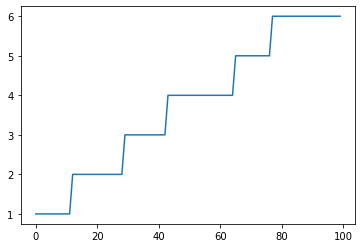

In [358]:
# your code here
dice100 = pd.read_csv(r'..\data\roll_the_dice_hundred.csv')
dice100.drop('Unnamed: 0', axis=1, inplace=True)

sort100 = list(dice100['value'])
sort100.sort()

plt.plot(sort100)
plt.show()

In [359]:
"""
The 100 values, ordered from 1 to 6, form a stair-like shape.
"""

'\nThe 100 values, ordered from 1 to 6, form a stair-like shape.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [375]:
# your code here
print(dicemean(dice100))
print(dicemedian(dice100))

3.74
4.5


#### 3.- Now, calculate the frequency distribution.


In [378]:
# your code here
freq100 = dice100.groupby(['value']).agg({'value':'count'})
freq100

,value
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

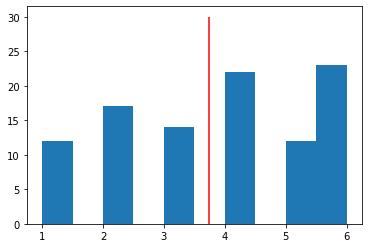

In [382]:
# your code here
plt.hist(dice100['value'])
plt.vlines([dicemean(dice100)], ymin=0, ymax=30, colors='r')
plt.show()

In [ ]:
"""
The mean is closer to 4 because the values 4 and 6 appeared more.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

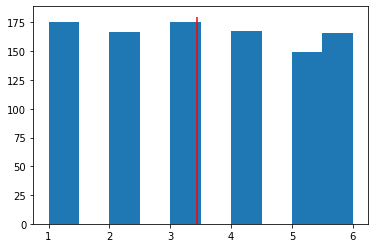

Mean: 3.447


In [391]:
# your code here
dice1000 = pd.read_csv(r'..\data\roll_the_dice_thousand.csv')
dice1000.drop('Unnamed: 0', axis=1, inplace=True)

plt.hist(dice1000['value'])
plt.vlines([dicemean(dice1000)], ymin=0, ymax=180, colors='r')
plt.show()

print(f'Mean: {dicemean(dice1000)}')

In [394]:
"""
In this case, the distribution is uniform, the mean is closer to 3.5 because each number appeared a similar number of times.
"""

'\nIn this case, the distribution is uniform, the mean is closer to 3.5 because each number appeared a similar number of times.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

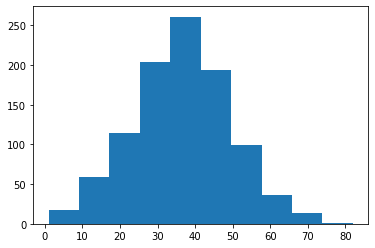

The mean will be around 35, and the standard deviation, around 15, considering that around 68% of the data is located between 20 and 50.


In [398]:
# your code here
ages = pd.read_csv(r'..\data\ages_population.csv')
plt.hist(ages)
plt.show()

print('The mean will be around 35, and the standard deviation, around 15, considering that around 68% of the data is located between 20 and 50.')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [402]:
# your code here
print('Mean:\n',np.mean(ages['observation']))
print('Standard deviation:\n',np.std(ages['observation']))

Mean:
 36.56
Standard deviation:
 12.81008977329979


In [403]:
"""
Yes, they do.
"""

'\nYes, they do.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

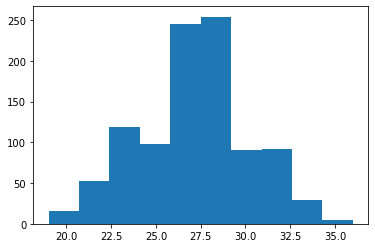

In [404]:
# your code here
ages2 = pd.read_csv(r'..\data\ages_population2.csv')
plt.hist(ages2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [405]:
"""
The ages are more concentrated between 26 and 28, the distribution has a lower dispersion.
"""

'\nThe ages are more concentrated between 26 and 28, the distribution has a lower dispersion.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [406]:
# your code here
print('Mean:\n',np.mean(ages2['observation']))
print('Standard deviation:\n',np.std(ages2['observation']))

Mean:
 27.155
Standard deviation:
 2.9683286543103704


In [407]:
"""
Since the distribution than the distribution of the previous dataset, the standard deviation is smaller.
"""

'\nSince the distribution than the distribution of the previous dataset, the standard deviation is smaller.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

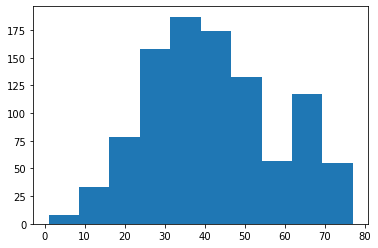

In [408]:
# your code here
ages3 = pd.read_csv(r'..\data\ages_population3.csv')
plt.hist(ages3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [412]:
# your code here
print('Mean:\n',np.mean(ages3['observation']))
print('Standard deviation:\n',np.std(ages3['observation']))

Mean:
 41.989
Standard deviation:
 16.136631587788084


In [413]:
"""
The distribution has a higher standard deviation because the ages are more disperse, but also more concentrated on the higher ages.
"""

'\nThe distribution has a higher standard deviation because the ages are more disperse, but also more concentrated on the higher ages.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [419]:
# your code here
q1 = np.quantile(ages3, 0.25)
print('The first quartile is',q1)
q2 = np.quantile(ages3, 0.5)
print('The second quartile is',q2)
q3 = np.quantile(ages3, 0.75)
print('The third quartile is',q3)

print(f"The difference between the median and the mean is: {np.mean(ages3['observation']) - np.median(ages3['observation'])}.")

The first quartile is 30.0
The second quartile is 40.0
The third quartile is 53.0
The difference between the median and the mean is: 1.9889999999999972.


In [420]:
"""
The difference between the mean and the median is almost 2 point because the distribution is negatively skewed.
"""

'\nThe difference between the mean and the median is almost 2 point because the distribution is negatively skewed.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [423]:
# your code here
p10, p20, p30, p40, p50 = np.quantile(ages3, 0.1), np.quantile(ages3, 0.2), np.quantile(ages3, 0.3), np.quantile(ages3, 0.4), np.quantile(ages3, 0.5)
p60, p70, p80, p90, maxage = np.quantile(ages3, 0.6), np.quantile(ages3, 0.7), np.quantile(ages3, 0.8), np.quantile(ages3, 0.9), np.quantile(ages3, 1)
print(f'P10: {p10}\nP20: {p20}\nP30: {p30}\nP40: {p40}\nP50: {p50}\nP60: {p60}\nP70: {p70}\nP80: {p80}\nP90: {p90}\nMax: {maxage}')

P10: 22.0
P20: 28.0
P30: 32.0
P40: 36.0
P50: 40.0
P60: 45.0
P70: 50.0
P80: 57.0
P90: 67.0
Max: 77.0


In [424]:
"""
The ages from the 60th percentile start to get more concentrated. From the 80th percentile, the is a differece of 10 point between each one until the max value.
"""

'\nThe ages from the 60th percentile start to get more concentrated. From the 80th percentile, the is a differece of 10 point between each one until the max value.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

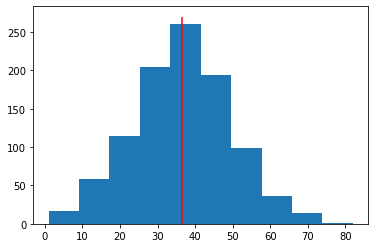

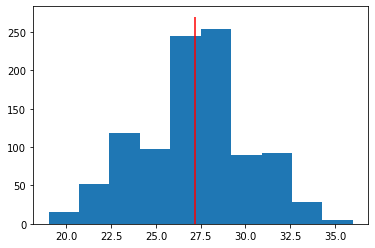

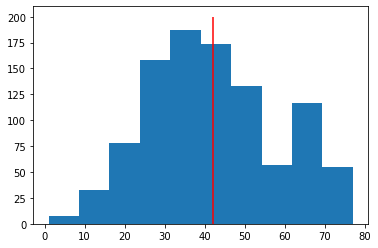

In [432]:
# your code here
plt.hist(ages)
plt.vlines([np.mean(ages['observation'])], ymin=0, ymax=270, colors='r')
plt.show()
plt.hist(ages2)
plt.vlines([np.mean(ages2['observation'])], ymin=0, ymax=270, colors='r')
plt.show()
plt.hist(ages3)
plt.vlines([np.mean(ages3['observation'])], ymin=0, ymax=200, colors='r')
plt.show()

In [433]:
"""
In the neighbourhood 1, the mayority of residents are about 35 year old.
The population of the neighbourhood 2 is the youngest of all three, with an average close to 27 and highly concentrated around that number.
The neighbourhood 3 is the oldest, the distribution is negatively skewed and it has the highest average age.
"""

'\nIn the neighbourhood 1, the mayority of residents are about 35 year old.\nThe population of the neighbourhood 2 is the youngest of all three, with an average close to 27 and highly concentrated around that number.\nThe neighbourhood 3 is the oldest, the distribution is negatively skewed and it has the highest average age.\n'